# Microsoft Stock Market Analysis (1986–2025)

This project analyzes the historical stock performance of Microsoft Corporation using data from 1986 to 2025. The goal is to explore key trends, identify periods of high volatility or unusual trading volume, and understand what may have caused them.

### Objectives:
- Identify periods of unusually high volatility or volume.
- Examine possible correlations between price changes and trading volume.
- Investigate external events (like the 2008 financial crisis, COVID-19) and their effect on stock behavior.
- Provide actionable insights or interesting findings based on the historical data.

_No machine learning is used – this is purely exploratory data analysis._

The dataset is obtained from Kaggle

## Questions that we aim to find the answers to during the analysis of the dataset

1. **What are the historical periods of highest volume?**

2. **When did Microsoft stock experience its most significant drop in closing price, and what was the context?**

3. **Are there price drops that correspond to increased volume?**
   
4. **When did MSFT show unusually high volatility?**

5. **How do moving averages compare to actual prices during major events?**
   
6. **Did any external events explain large changes?**
   
7. **how does trading volume change during periods of high volalitity**

## 2. Data Import & Cleaning

To begin with the project we have to load the dataset, parse dates and handle missing values(if any).

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("MSFT_1986-03-13_2025-04-06.csv")

In [38]:
df.describe()

,open,high,low,close,adj_close,volume
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9.843000e+03
mean,64.622292,65.275764,63.948017,64.636276,58.810469,5.616597e+07
std,100.870397,101.787035,99.891530,100.886828,100.792187,3.810176e+07
min,0.088542,0.092014,0.088542,0.090278,0.055442,2.304000e+06
25%,5.957031,6.050781,5.871094,5.960938,3.660794,3.120230e+07
50%,27.500000,27.840000,27.240000,27.540001,19.283705,4.925320e+07
75%,48.239374,48.865000,47.678125,48.270000,40.589182,7.017795e+07
max,467.000000,468.350006,464.459991,467.559998,464.854340,1.031789e+09


The dataset contains five columns:
- open - the price of the stock at the start of the day
- close - the price of the stock at the end of the time period
- low - the lowest price the stock had the particular time period
- high -  the highest the price went in the particular time period
- adj_close - the close price after considering dividends, stock splits and from new shares being issued
- volume - the volume traded in the particular time period

In [39]:
print(df.info())
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       9843 non-null   object 
 1   open       9843 non-null   float64
 2   high       9843 non-null   float64
 3   low        9843 non-null   float64
 4   close      9843 non-null   float64
 5   adj_close  9843 non-null   float64
 6   volume     9843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 538.4+ KB
None


,date,open,high,low,close,adj_close,volume
0,1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400
5,1986-03-20 00:00:00-05:00,0.098090,0.098090,0.094618,0.095486,0.058641,58435200
6,1986-03-21 00:00:00-05:00,0.095486,0.097222,0.091146,0.092882,0.057042,59990400
7,1986-03-24 00:00:00-05:00,0.092882,0.092882,0.089410,0.090278,0.055442,65289600
8,1986-03-25 00:00:00-05:00,0.090278,0.092014,0.089410,0.092014,0.056509,32083200
9,1986-03-26 00:00:00-05:00,0.092014,0.095486,0.091146,0.094618,0.058108,22752000


We begin by converting the `date` column to datetime format, setting it as the index, and ensuring the dataset is sorted chronologically. Missing values (mostly due to rolling window calculations) are dropped where necessary.


In [40]:
print(df['date'].dtype)

object


In [41]:
df['date'] = pd.to_datetime(df['date'],utc=True).dt.tz_localize(None)

print(df['date'].dtype) 


datetime64[ns]


In [42]:
df.set_index('date', inplace=True) 

In [43]:
df.head(10)

,open,high,low,close,adj_close,volume
date,,,,,,
1986-03-13 05:00:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1986-03-14 05:00:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
1986-03-17 05:00:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
1986-03-18 05:00:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
1986-03-19 05:00:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400
1986-03-20 05:00:00,0.098090,0.098090,0.094618,0.095486,0.058641,58435200
1986-03-21 05:00:00,0.095486,0.097222,0.091146,0.092882,0.057042,59990400
1986-03-24 05:00:00,0.092882,0.092882,0.089410,0.090278,0.055442,65289600
1986-03-25 05:00:00,0.090278,0.092014,0.089410,0.092014,0.056509,32083200


In [44]:
df.isnull().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

## 3. Feature Engineering

To help with the analysis we engineer new features that are gonna help us in the analysis like:

- `daily_return`: percentage change in closing price.
- `volatility_30`: 30-day rolling standard deviation.
- `SMA_30`, `SMA_100`: Simple Moving Averages.
- `open_to_close_pct`: % difference between open and close price.
- `price_volume_signal`: product of return and volume, a proxy for market sentiment.


In [ ]:
df['daily_return'] = df['close'].pct_change()

df['volatility_30'] = df['daily_return'].rolling(window=30).std()

df['SMA_30'] = df['close'].rolling(window=30).mean()

df['SMA_100'] = df['close'].rolling(window=100).mean()

df['open_to_close_pct'] = ( df['open'] - df['close']) / df['open']

df['price_volume_signal'] = (df['open'] - df['close']) * df['volume']

In [46]:
df.describe()

,open,high,low,close,adj_close,volume,daily_return,volatility_30,SMA_30,SMA_100,open_to_close_pct,price_volume_signal,high_low_drop_pct
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9.843000e+03,9842.000000,9813.000000,9814.000000,9744.000000,9843.000000,9.843000e+03,9843.000000
mean,64.622292,65.275764,63.948017,64.636276,58.810469,5.616597e+07,0.001057,0.018989,64.259909,63.233800,-0.000647,2.734833e+04,0.024420
std,100.870397,101.787035,99.891530,100.886828,100.792187,3.810176e+07,0.021028,0.009209,100.182720,98.102133,0.017996,6.692150e+07,0.015011
min,0.088542,0.092014,0.088542,0.090278,0.055442,2.304000e+06,-0.301159,0.004598,0.098249,0.104727,-0.157576,-1.258332e+09,0.003741
25%,5.957031,6.050781,5.871094,5.960938,3.660794,3.120230e+07,-0.009178,0.012783,5.902800,5.865742,-0.009766,-9.366407e+06,0.014257
50%,27.500000,27.840000,27.240000,27.540001,19.283705,4.925320e+07,0.000347,0.017553,27.494667,27.436900,0.000000,0.000000e+00,0.020729
75%,48.239374,48.865000,47.678125,48.270000,40.589182,7.017795e+07,0.011145,0.022969,48.030167,47.778675,0.008605,8.157216e+06,0.030173
max,467.000000,468.350006,464.459991,467.559998,464.854340,1.031789e+09,0.195652,0.091615,449.481666,428.689099,0.264227,1.020038e+09,0.291338


## 4. Visualizing Stock Trends

Now we shall visualize various features of the dataset(original and engineered) and on the way we will be answering the key questions posed earlier 


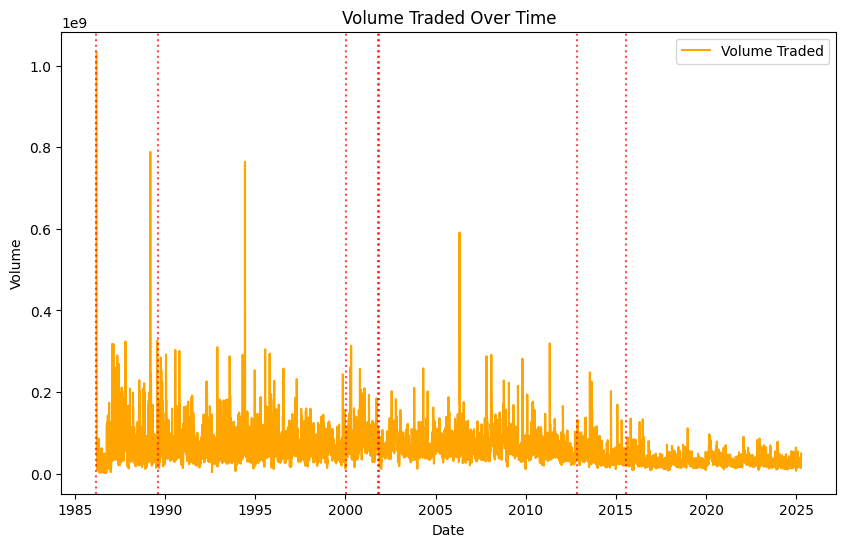

In [47]:
plt.figure(figsize=(10,6))
plt.plot(df['volume'], color='orange', label='Volume Traded')
important_dates = [
    '1986-03-13',  # IPO
    '1989-08-01',  # MS Office Release
    '2001-11-15',  # Xbox Launch
    '2000-01-13',  # Bill Gates stepping down
    '2001-10-25',  # Windows XP
    '2012-10-26',  # Windows 8
    '2015-07-29'   # Windows 10
]

for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle=':', alpha=0.7)
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In this plot we can see four significant spikes in volume traded

Q1. **What are the historical periods of highest volume?**

In [48]:
df[df['volume'] >0.5*1000000000]

,open,high,low,close,adj_close,volume,daily_return,volatility_30,SMA_30,SMA_100,open_to_close_pct,price_volume_signal,high_low_drop_pct
date,,,,,,,,,,,,,
1986-03-13 05:00:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800,NaN,NaN,NaN,NaN,-0.098033,-8.955928e+06,0.128206
1989-03-07 05:00:00,0.414931,0.416667,0.369792,0.371528,0.228167,788688000,-0.137097,0.032568,0.414757,0.368168,0.104603,3.423142e+07,0.112500
1994-06-06 04:00:00,3.289063,3.414063,3.234375,3.406250,2.091883,764504000,0.030733,0.017774,3.061979,2.750235,-0.035629,-8.958995e+07,0.052632
2006-04-28 04:00:00,24.230000,24.500000,24.000000,24.150000,16.987009,591052200,-0.113761,0.022218,27.131333,27.038800,0.003302,4.728413e+07,0.020408


- March 13, 1986: This marks Microsoft's Initial Public Offering (IPO) on the NASDAQ. The exceptionally high volume (over 1 billion shares) reflects significant investor interest during the company's first public trading day.
- In 1989, Microsoft released Microsoft Office in August, its most successful product. The volume is most like in view of its release
-  No major corporate event aligns with this date. However, our engineered feature open_to_close_pct is negative, suggesting the stock closed lower than it opened. Combined with high volume, this could indicate panic selling or market correction behavior — possibly investor reactions to broader market conditions
- In 2006, April 27 Microsoft released a quarterly report stating 13% growth in sales and 16% rise in net income, reaching $10.9 billion in revenue. The company also announced upcoming product launches like Windows Vista, which likely boosted investor optimism and trading activity.

### Now let look at how daily return was over the duration of the datasets time period

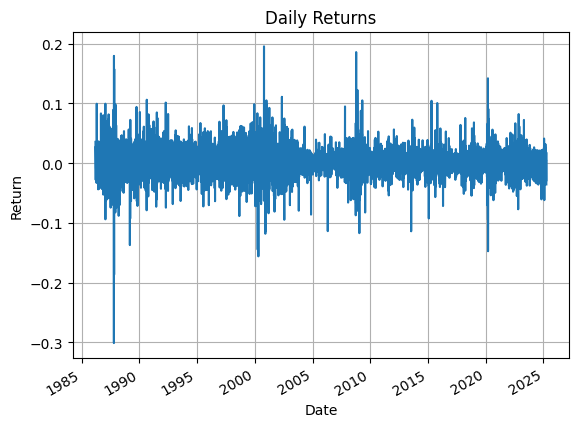

In [53]:
df['daily_return'].plot()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()


From this plot it is evident there is one very significant drop in daily returns.

Q2. **When did Microsoft stock experience its most significant drop in closing price, and what was the context?**

In [54]:
significant_drop_info = df[df['daily_return'] == df['daily_return'].min()]
significant_drop_info

,open,high,low,close,adj_close,volume,daily_return,volatility_30,SMA_30,SMA_100,open_to_close_pct,price_volume_signal,high_low_drop_pct
date,,,,,,,,,,,,,
1987-10-19 04:00:00,0.427083,0.440972,0.3125,0.314236,0.192982,146880000,-0.301159,0.067493,0.443446,0.385686,0.264227,1.657497e+07,0.291338


The most significant single-day drop in Microsoft's closing price occurred on October 19, 1987, a day known globally as Black Monday. On this day, stock markets around the world crashed unexpectedly, with the Dow Jones Industrial Average dropping over 22% — the largest single-day percentage loss in its history.

Microsoft's stock mirrored this global panic, experiencing a sharp decline in its closing price. This drop was not due to company-specific issues, but rather part of a broader market-wide crash caused by a combination of program trading, overvaluation, and investor panic.

### Next we turn towards 30 day volatility

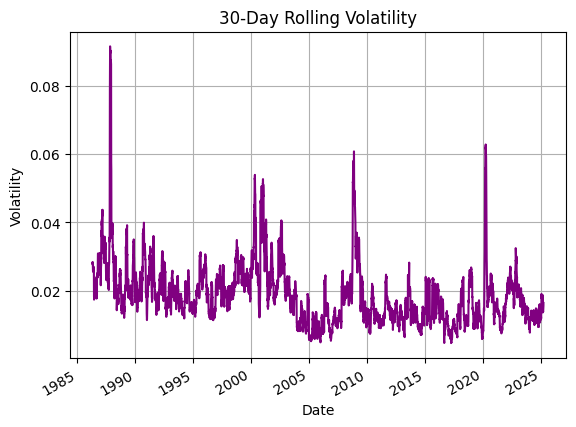

In [55]:
df['volatility_30'].plot(color='purple')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


From the graph we can see there are 3 notable spikes whose volatility_30 value is greater than '0.06'. 

Q3. **When did MSFT show unusually high volatility?**

To answer this we will get the values greater than 0.06 separately

In [ ]:
df[df['volatility_30'] > 0.06]

,open,high,low,close,adj_close,volume,daily_return,volatility_30,SMA_30,SMA_100,open_to_close_pct,price_volume_signal,high_low_drop_pct
date,,,,,,,,,,,,,
1987-10-19 04:00:00,0.427083,0.440972,0.312500,0.314236,0.192982,146880000,-0.301159,0.067493,0.443446,0.385686,0.264227,1.657497e+07,0.291338
1987-10-20 04:00:00,0.319444,0.361111,0.298611,0.333333,0.204710,324000000,0.060773,0.068537,0.441652,0.385017,-0.043479,-4.500031e+06,0.173077
1987-10-21 04:00:00,0.359375,0.420139,0.347222,0.393229,0.241494,262080000,0.179688,0.076163,0.441710,0.385026,-0.094202,-8.872458e+06,0.173554
1987-10-22 04:00:00,0.394097,0.402778,0.354167,0.369792,0.227101,223200000,-0.059601,0.076977,0.440784,0.384818,0.061673,5.424873e+06,0.120689
1987-10-23 04:00:00,0.364583,0.368056,0.329861,0.335069,0.205776,112766400,-0.093899,0.078827,0.438498,0.384236,0.080953,3.328186e+06,0.103775
1987-10-26 05:00:00,0.322917,0.333333,0.258681,0.272569,0.167393,148320000,-0.186529,0.085422,0.433782,0.383056,0.155916,7.467617e+06,0.223956
1987-10-27 05:00:00,0.282986,0.298611,0.272569,0.286458,0.175923,234720000,0.050956,0.086140,0.429687,0.382127,-0.012269,-8.149479e+05,0.087210
1987-10-28 05:00:00,0.277778,0.295139,0.267361,0.286458,0.175923,149760000,0.000000,0.086151,0.425723,0.381181,-0.031248,-1.299915e+06,0.094118
1987-10-29 05:00:00,0.286458,0.338542,0.286458,0.331597,0.203644,167040000,0.157576,0.091275,0.423351,0.380712,-0.157576,-7.540021e+06,0.153848


Microsoft's stock showed unusually high 30-day volatility during several key periods that correspond to major global events:

- October 1987 – The Black Monday stock market crash led to a sharp spike in volatility, reflecting widespread panic and market disruption.

- 2008–2009 – During the Global Financial Crisis, volatility increased significantly due to the collapse of major financial institutions and economic uncertainty.

- 2020 – The COVID-19 pandemic caused a surge in volatility as markets reacted to the global health crisis, lockdowns, and economic slowdown.

These spikes indicate that external macroeconomic and geopolitical events had a substantial impact on Microsoft’s stock price behavior, triggering larger fluctuations during those periods.



4. **How do moving averages compare to actual prices during major events?**
To analyse this three major events are chosen: Black Monday, 2008 Global Financial Crisis and COVID Pandemic

In [57]:
df_corona_time_period = df.loc['2020-02-01':'2020-04-30']
df_financial_crisis_period = df.loc['2008-08-01':'2009-02-01']
df_black_monday_period = df.loc['1987-10-01':'1987-11-30']

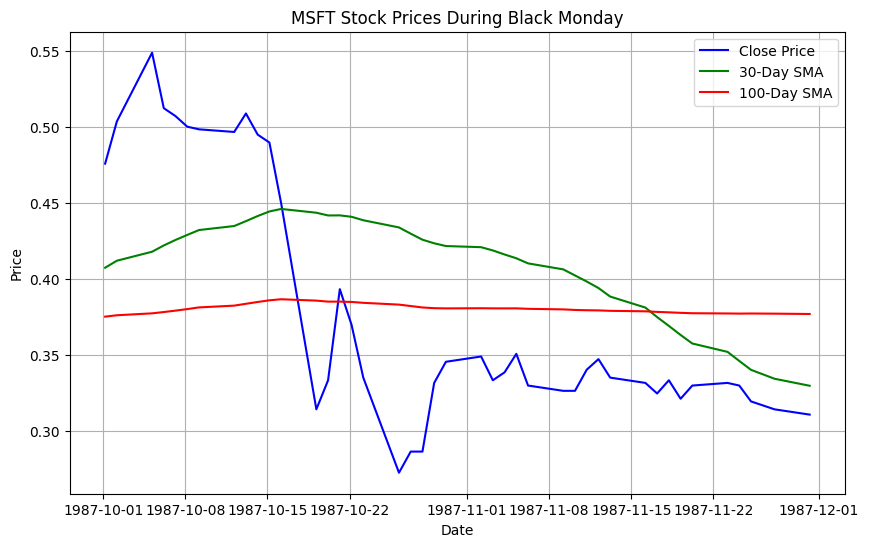

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(df_black_monday_period['close'], label='Close Price', color='blue')
plt.plot(df_black_monday_period['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df_black_monday_period['SMA_100'], label='100-Day SMA', color='red')
plt.title('MSFT Stock Prices During Black Monday')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

A sharp drop in the close price occurs in mid-October 1987, marking the Black Monday crash.
The 30-day SMA and 100-day SMA both trend downward after the price drop, confirming a bearish trend.

MSFT suffered a quick and severe drop during Black Monday and failed to recover within the short-term window shown here.

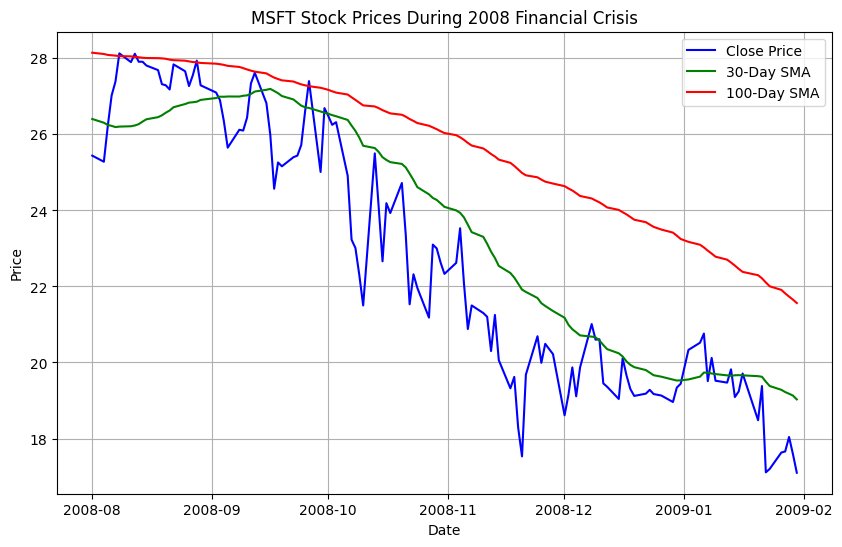

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(df_financial_crisis_period['close'], label='Close Price', color='blue')
plt.plot(df_financial_crisis_period['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df_financial_crisis_period['SMA_100'], label='100-Day SMA', color='red')
plt.title('MSFT Stock Prices During 2008 Financial Crisis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

The close price shows a steady downward trend from mid-2008 to early 2009.
The 30-day SMA tracks this decline more closely than the 100-day SMA, which is slower to respond.

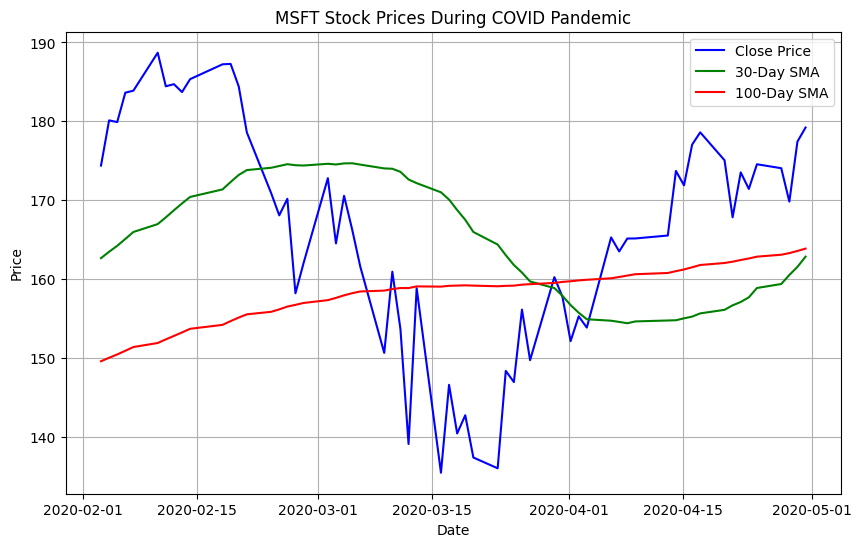

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(df_corona_time_period['close'], label='Close Price', color='blue')
plt.plot(df_corona_time_period['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df_corona_time_period['SMA_100'], label='100-Day SMA', color='red')
plt.title('MSFT Stock Prices During COVID Pandemic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

The Close Price shows high volatility, while 30-day SMA reacts faster and follows the dip more closely than the 100-day SMA (red).
After the crash, prices recover steadily, with the close price eventually surpassing both SMAs, indicating a return to bullish momentum.

This reflects a rapid crash followed by a relatively quick recovery in MSFT stock price during the COVID-19 crisis.

During major market events, such as financial crises or crashes, moving averages (MAs) serve as lagging indicators that smooth out short-term volatility and highlight broader price trends. Comparing them to actual prices reveals key dynamics:

In sharp crashes (e.g., Black Monday 1987, COVID-19 crash 2020):

- The actual prices drop suddenly, while both the 30-day and 100-day SMAs decline more gradually due to their averaging nature.

- The 30-day SMA responds faster to the drop than the 100-day SMA, which is more stable and slower to react.

- After a recovery (as in COVID-19), the actual price rebounds first, crossing above the MAs, signaling a potential trend reversal.

In prolonged downturns (e.g., 2008 Financial Crisis):

- Actual prices and MAs trend downward together, but MAs consistently lag behind.

- There is less deviation between the SMAs and actual price over time, reinforcing the sustained bearish sentiment.

- Neither SMA provides an early signal of recovery, as actual prices stay below both MAs.

Conclusion:
During crises, actual prices are more volatile and reactive, while MAs provide delayed but smoothed confirmation of trend direction. Shorter-term SMAs (like 30-day) are more responsive and better at capturing recent shifts, whereas longer-term SMAs (like 100-day) offer stability and help filter out noise. The relationship between the price and its MAs can be used to detect oversold or overbought conditions and potential turning points, especially when the price crosses above or below these averages.

Q5. **How does trading volume change during periods of high volalitity**

For this the dataset is categorised into 3 quantiles based on the 30-day rolling volatility feature to better understand how frequently each level occurs.

In [61]:
df['volatility_level'] = pd.qcut(df['volatility_30'], q=3, labels=['Low', 'Medium', 'High'])

In [62]:
df.head(100)

,open,high,low,close,adj_close,volume,daily_return,volatility_30,SMA_30,SMA_100,open_to_close_pct,price_volume_signal,high_low_drop_pct,volatility_level
date,,,,,,,,,,,,,,
1986-03-13 05:00:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800,NaN,NaN,NaN,NaN,-0.098033,-8.955928e+06,0.128206,NaN
1986-03-14 05:00:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000,0.035712,NaN,NaN,NaN,-0.035712,-1.069932e+06,0.050854,NaN
1986-03-17 05:00:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200,0.017250,NaN,NaN,NaN,-0.017250,-2.313182e+05,0.025218,NaN
1986-03-18 05:00:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400,-0.025432,NaN,NaN,NaN,0.025432,1.765314e+05,0.042024,NaN
1986-03-19 05:00:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400,-0.017390,NaN,NaN,NaN,0.017390,8.314469e+04,0.034481,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-07-29 04:00:00,0.105903,0.106771,0.101563,0.103299,0.063439,14054400,-0.024589,0.022679,0.104485,NaN,0.024589,3.659766e+04,0.048777,High
1986-07-30 04:00:00,0.103299,0.103299,0.096354,0.099826,0.061306,26409600,-0.033621,0.023171,0.104138,NaN,0.033621,9.172051e+04,0.067232,High
1986-07-31 04:00:00,0.099826,0.100694,0.098958,0.098958,0.060773,15638400,-0.008695,0.023177,0.103791,NaN,0.008695,1.357413e+04,0.017240,High


C:\Users\TRIOXS\AppData\Local\Temp\ipykernel_33772\2965147029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('volatility_level')['volume'].mean()


<Axes: xlabel='volatility_level', ylabel='volume'>

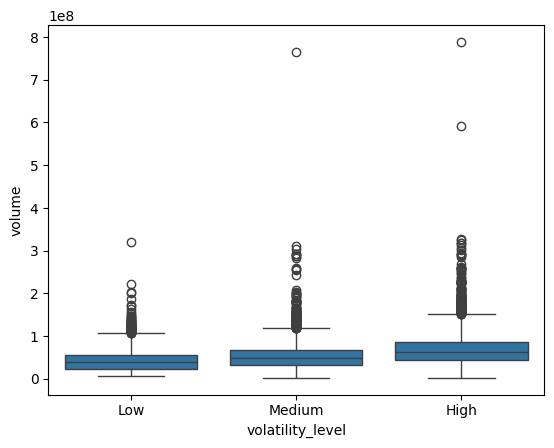

In [69]:
df.groupby('volatility_level')['volume'].mean()

sns.boxplot(x='volatility_level', y='volume', data=df)


The median volume is lowest in Low volatility, and increases progressively in Medium and High volatility categories.
The interquartile range (IQR) also widens slightly as volatility increases, indicating more variability in volume.
All distributions are positively skewed with numerous outliers on the higher end.
There are many extreme volume values, especially in the Medium and High categories. High volatility especially has the largest outliers. Especially four notable values which are the four high volume trades we have discussed above.

We can conclude that higher volatility tends to coincide with higher and more varied trading volumes.

Q6. **Are there price drops that correspond to increased volume?**

In [64]:
# Define a threshold for significant price drop
df['price_drop_flag'] = df['daily_return'] < -0.02


In [65]:
drop_volume_mean = df[df['price_drop_flag']]['volume'].mean()
normal_volume_mean = df[~df['price_drop_flag']]['volume'].mean()

print(f"Average volume on price drop days: {drop_volume_mean}")
print(f"Average volume on normal days: {normal_volume_mean}")


Average volume on price drop days: 81106178.90841813
Average volume on normal days: 53089005.62656928


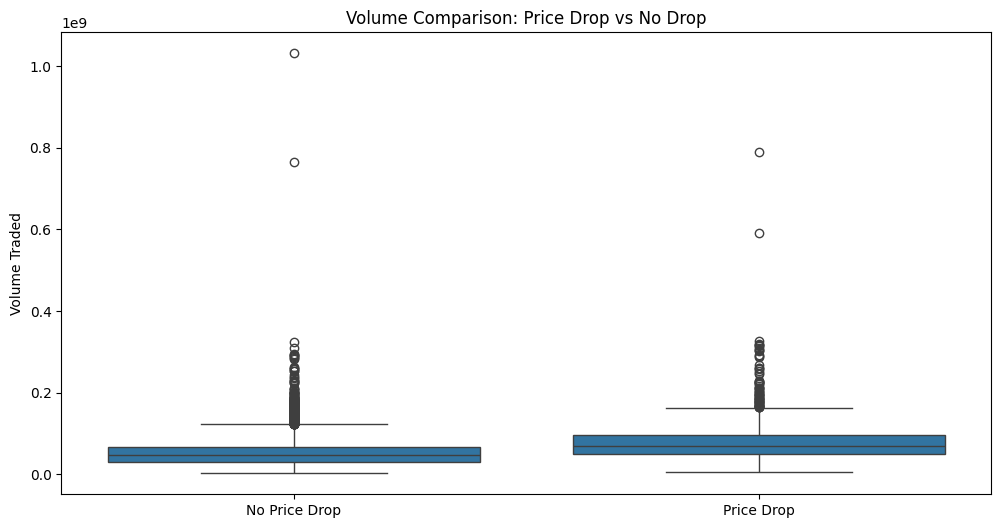

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x='price_drop_flag', y='volume', data=df)
plt.xticks([0, 1], ['No Price Drop', 'Price Drop'])
plt.title('Volume Comparison: Price Drop vs No Drop')
plt.ylabel('Volume Traded')
plt.xlabel('')
plt.show()


From the plot above,
The median trading volume is slightly higher in the 'Price Drop' group compared to the 'No Price Drop' group.
This implies that more shares are typically traded on days when prices drop.
The spread of volumes is wider for the Price Drop category, indicating greater variability in volume when prices fall.
Both categories have many outliers, but the 'No Price Drop' group includes some extremely high outliers, even exceeding 1 billion in volume.
This suggests that unusually high trading can also occur on stable or rising price days, though less frequently.

Price drops tend to be associated with higher typical trading volumes, potentially due to panic selling or rebalancing by investors.
However, extreme trading spikes (very high outliers) can occur regardless of price movement, possibly due to external events or market manipulation.